In [1]:
from utils.solver import solve_SCRMFT, solve_woods_saxon_RMFT
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rc('figure', figsize=(6, 6))

In [2]:
input_file = pd.read_excel('./input_files/O16_RMF.xlsx', sheet_name=None)
# input_file = pd.read_excel('./input_files/Ca40_RMF.xlsx', sheet_name=None)
# input_file = pd.read_excel('./input_files/Pb208_RMF.xlsx', sheet_name=None)

Important to note that sometimes code fails because match radius might be too close to a node. If we get error that there is an invalid quantity inside a square root, then see which energy failed and play around with the match radius until it works.

At the moment, I am using the SAME r_middle for every wavefunction. If r_middle is different for each wavefuction, then the radial grid each single particle wavefunction is evaluated at is DIFFERENT. The code I have written ASSUMES the radial grids are all the SAME. Important to keep this in mind.

Note that the energy offset is important and the match radius has influence on if you reach the correct energy

In [3]:
energy, wfk, scalar_field, vector_field, rho_field, coulomb_field = solve_SCRMFT(input_file)
# energy, wfk, scalar_field, vector_field, rho_field, coulomb_field = solve_woods_saxon_RMFT(input_file)


------------ ITERATION 0 ------------

--------------
NEUTRON STATES
--------------
----------------------------------------------------------------------------
1S1/2
Succesfully converged in 4 iterations, energy is : 903.071270100536
The discontinuity in the u-wavefunction is: 0.00016864164626251288
----------------------------------------------------------------------------
1P3/2
Succesfully converged in 7 iterations, energy is : 918.1712672637022
The discontinuity in the u-wavefunction is: 0.0002736330212799176
----------------------------------------------------------------------------
1P1/2
Succesfully converged in 3 iterations, energy is : 923.9768955585093
The discontinuity in the u-wavefunction is: 5.359072996258263e-06

-------------
PROTON STATES
-------------
----------------------------------------------------------------------------
1S1/2
Succesfully converged in 4 iterations, energy is : 903.071270100536
The discontinuity in the u-wavefunction is: 0.00016864164626251288


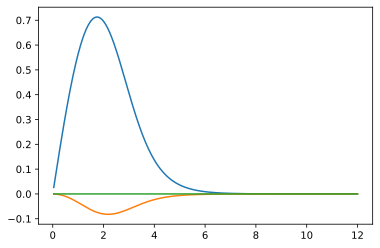

In [4]:
index = 3
r_array = wfk[index][0]
u_array = wfk[index][1]
v_array = wfk[index][2]

zero_line = [0] * len(r_array)
plt.plot(r_array,u_array)
plt.plot(r_array,v_array)
plt.plot(r_array,zero_line)

In [5]:
energy

array([[ 9.01856677e+02,  2.00000000e+00,  5.00000000e-01],
       [ 9.22329748e+02,  4.00000000e+00,  5.00000000e-01],
       [ 9.30227838e+02,  2.00000000e+00,  5.00000000e-01],
       [ 8.97645649e+02,  2.00000000e+00, -5.00000000e-01],
       [ 9.18444165e+02,  4.00000000e+00, -5.00000000e-01],
       [ 9.26466420e+02,  2.00000000e+00, -5.00000000e-01]])

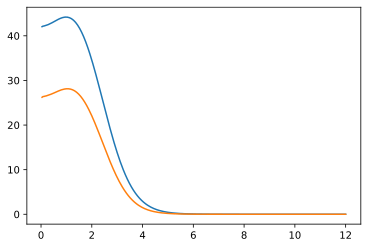

In [6]:
plt.plot(r_array,scalar_field(r_array))
plt.plot(r_array,vector_field(r_array))

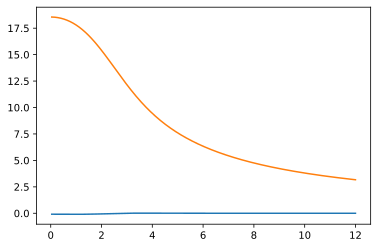

In [7]:
plt.plot(r_array,rho_field(r_array))
plt.plot(r_array,coulomb_field(r_array))